<a href="https://colab.research.google.com/github/andresmarquez236/ProyectoIA/blob/main/ANN_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Unnamed: 0          [1869, 4528, 6344, 6739, 432, 2215, 5260, 6001...
customerID          [7010-BRBUU, 9688-YGXVR, 9286-DOJGF, 6994-KERX...
gender                                                 [Male, Female]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents          

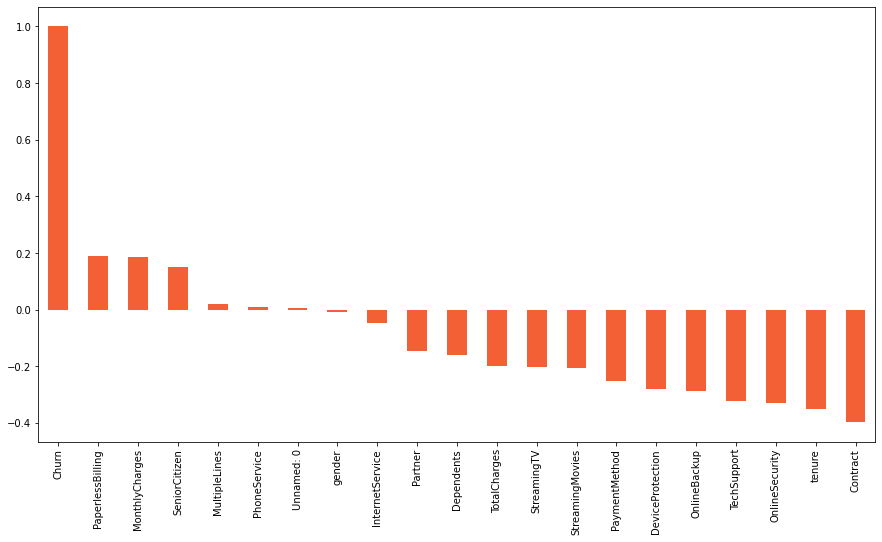

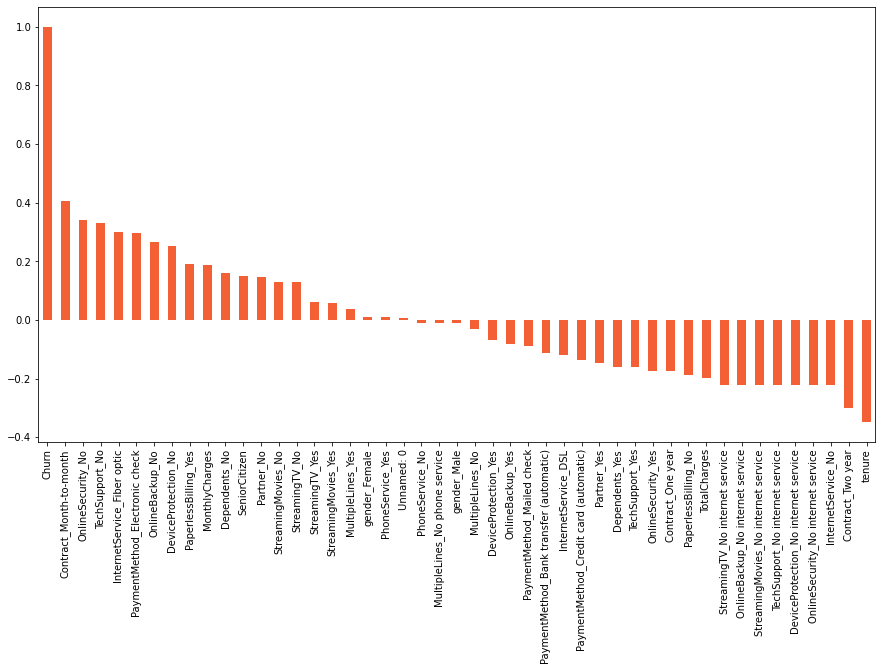

In [67]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 21 19:38:54 2021

@author: edwin

Proyecto Final Inteligencia artificial Prediccion de la desercion de clientes de una empresa de telecomunicaciones
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics
import copy 

ruta = 'E:/User/Escritorio/SEMESTRE 9/INTELIGENCIA ARTIFICIAL/Proyecto Final/clientes_telecomunicaciones.csv'
telcoData_original = pd.read_csv("telecom_users.csv")              # Cargo los datos  
telcoData = copy.deepcopy(telcoData_original)        # genero una copia real de los datos
print(telcoData.dtypes)
unicos = telcoData.apply(lambda col: col.unique())
print(telcoData.apply(lambda col: col.unique()))     # Hallo los valores unicos de cada columna

#------------- Limplieza y arreglo de los datos (PREPROCESO)------------
telcoData.drop('customerID', inplace=True, axis=1) # elimino el ID de cliente
# Convertir cargos totales a un tipo de datos numéricos.
telcoData.TotalCharges = pd.to_numeric(telcoData.TotalCharges, errors='coerce')

# camdio de valores categoricos a numericos
telcoData['Churn'] = telcoData['Churn'].map({'Yes':1, 'No':0}) 
df_dummies = pd.get_dummies(telcoData) # genero dummy variable para graficar la correlación luego

telcoData['gender'] = telcoData['gender'].map({'Male':1, 'Female': 0})     
telcoData['Partner'] = telcoData['Partner'].map({'Yes':1, 'No':0})   
telcoData['Dependents'] = telcoData['Dependents'].map({'Yes':1, 'No':0}) 
telcoData['PhoneService'] = telcoData['PhoneService'].map({'Yes':1, 'No':0})
telcoData['MultipleLines'] = telcoData['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service':2})
telcoData['InternetService'] = telcoData['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})

telcoData['OnlineSecurity'] = telcoData['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['OnlineBackup'] = telcoData['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['DeviceProtection'] = telcoData['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['TechSupport'] = telcoData['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['StreamingTV'] = telcoData['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
telcoData['StreamingMovies'] = telcoData['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})

telcoData['Contract'] = telcoData['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
telcoData['PaperlessBilling'] = telcoData['PaperlessBilling'].map({'No':0, 'Yes':1})
telcoData['PaymentMethod'] = telcoData['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1,'Credit card (automatic)':2, 'Bank transfer (automatic)':3 })
telcoData.dropna(inplace=True)  #borrar los valores faltantes de TotalCharges

print(telcoData.isnull().sum())                     # verifica si hay valores faltantes
print(telcoData.apply(lambda col: col.unique()))     # Hallo los valores unicos de cada columna
print(telcoData.dtypes)


#----- Visualizar la correlacion de las características con el target para ver cuales son las mas importantes
plt.figure(figsize=(15,8))
telcoData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Normalizacion de los datos.

In [68]:
DATOSPCA=telcoData;
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(DATOSPCA)

Matriz de covarianza.

In [69]:
print('matriz de covarianza: \n%s' %np.cov(X_std.T))

matriz de covarianza: 
[[ 1.00016736e+00 -7.51152868e-03 -5.92756113e-04 -8.15495902e-04
  -7.19359963e-03  8.85642574e-03 -2.58134937e-02  9.05380206e-03
  -1.38745531e-02 -3.72586455e-03 -7.80735679e-03 -1.03172734e-02
   3.09691777e-04 -5.68268795e-03 -1.67250165e-02  6.77190648e-03
   8.73343413e-03 -1.98205185e-02 -1.01494029e-02  3.62077479e-03
   6.28263064e-03]
 [-7.51152868e-03  1.00016736e+00 -7.32295836e-03 -7.46117194e-03
   8.64474294e-03  3.61733366e-03 -6.17085969e-03  4.39771218e-03
  -3.26996239e-03 -8.24404561e-03 -7.39534970e-03  1.58703752e-03
  -1.81683555e-03 -1.39020994e-03 -1.31886882e-03 -2.12705395e-03
  -1.39753186e-02 -1.45029397e-02 -1.34188546e-02 -3.36453465e-03
  -9.37841773e-03]
 [-5.92756113e-04 -7.32295836e-03  1.00016736e+00  1.53480971e-02
  -2.13599042e-01  4.50377980e-03  9.23206833e-03  9.16878083e-02
  -3.33514055e-02 -2.11756869e-01 -1.56319815e-01 -1.57270051e-01
  -2.25604860e-01 -1.33479833e-01 -1.24726553e-01 -1.48669168e-01
   1.55467541e-

In [70]:
cov_mat = np.cov(X_std.T)
#autovectores y autovalores
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.23185976e-03  2.37228157e-03  2.66117342e-02 -3.83647004e-02
   3.88811989e-02  6.95304468e-01 -7.09131665e-01 -6.00239170e-02
  -5.97782904e-02 -2.48533240e-02 -3.91865575e-02 -1.66268022e-02
  -2.07515368e-03  7.36201602e-03  3.87059398e-03  4.69450347e-03
   3.36079669e-03 -1.46151122e-02 -5.21959523e-03  3.72070276e-03
  -1.05399945e-03]
 [-3.47662237e-04 -2.27336187e-03  1.98438180e-02  2.50346121e-02
  -1.31609858e-02 -7.14074872e-01 -6.93088462e-01 -1.08790999e-02
  -8.68586153e-02 -1.50609737e-02  1.99880802e-03  1.58800239e-02
  -2.69618153e-03 -3.08535400e-03 -1.14012489e-02  3.53293952e-03
  -4.76784872e-03 -9.73491871e-03 -5.49113429e-03 -8.55252195e-03
  -7.85209180e-04]
 [-9.80164853e-02  6.98935685e-03 -1.84654686e-01 -4.35067761e-01
   1.54753976e-01 -4.72623625e-02  4.07964232e-02 -7.74235526e-01
  -9.62687536e-02  1.99647000e-01  1.92449379e-01 -2.22300954e-01
   5.84132097e-03  2.71652103e-02 -6.70759817e-03 -2.53412742e-02
  -1.27234517e-02 -5.973

 autovectores correspondientes a las componentes principales


In [71]:

#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
6.393042884728667
3.109079799752841
1.8698819730634837
1.3256816429192162
1.1280474245934704
1.0080273035294856
0.9951563051450105
0.8585002492510704
0.7806654487433988
0.7172123308531622
0.4940556800487127
0.4705234942821207
0.33146223087236193
0.26150179897862136
0.23872109442898615
0.22803961138624534
0.2097600041800036
0.19467369516577643
0.1891676696703221
0.15230527607619712
0.04800872668231671


In [72]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)



In [73]:
#Proyectamos los datos sobre un espacio de dimensionalidad menor.
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1),
                     eig_pairs[1][1].reshape(21,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)
print(Y);

Matriz W:
 [[-4.23185976e-03  2.37228157e-03]
 [-3.47662237e-04 -2.27336187e-03]
 [-9.80164853e-02  6.98935685e-03]
 [ 5.53799196e-02  3.03366925e-01]
 [ 9.87374997e-02  1.63243948e-01]
 [ 8.05372702e-02  5.06265934e-01]
 [ 8.04694371e-02 -3.95957619e-02]
 [-1.17082923e-01  2.13059670e-01]
 [ 2.91823320e-01 -1.39371929e-01]
 [ 3.51214325e-01 -2.67200539e-02]
 [ 3.42921394e-01 -1.39396934e-02]
 [ 3.49461266e-01 -5.13770383e-03]
 [ 3.55092150e-01 -2.13139305e-02]
 [ 3.37614423e-01 -2.73417353e-02]
 [ 3.37881292e-01 -2.33594703e-02]
 [ 1.87539081e-01  3.77919264e-01]
 [-1.47964351e-01  4.21132535e-02]
 [ 9.64577723e-02  2.30655584e-01]
 [-2.39940263e-01  2.51898421e-01]
 [-4.50062744e-02  4.97842850e-01]
 [-1.49850097e-01 -2.16303707e-01]]
[[ 5.0248544   1.42680163]
 [-0.92297643  0.20259876]
 [-2.74283158  0.4499739 ]
 ...
 [ 4.13139653 -1.6944203 ]
 [-2.01421653 -1.53476228]
 [ 4.56137184 -1.58302983]]


ANN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


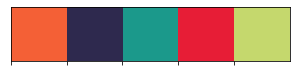

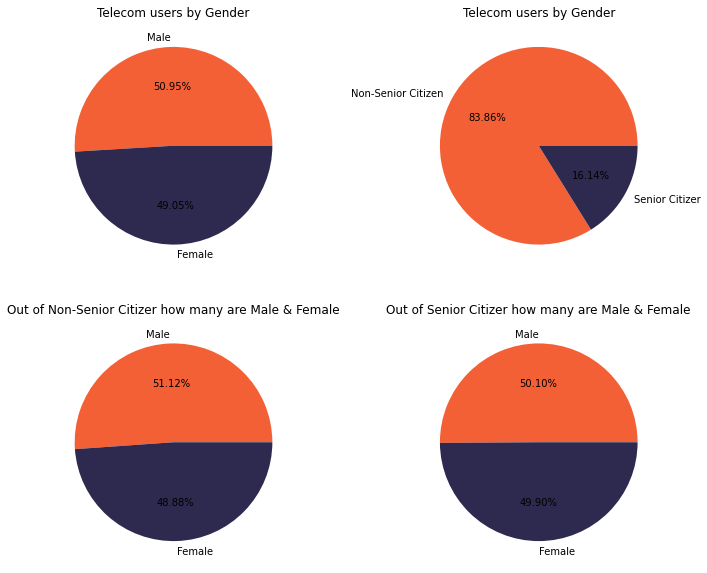

In [74]:
import numpy as np
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette(["#f46036","#2E294E","#1b998b","#e71d36","#c5d86d"]))
pal=sns.color_palette(["#f46036","#2E294E","#1b998b","#e71d36","#c5d86d"])
sns.palplot(["#f46036","#2E294E","#1b998b","#e71d36","#c5d86d"])
df =pd.read_csv('telecom_users.csv')
df.head()
df.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)
df.info()
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
colors=["#f46036","#2E294E","#1b998b","#e71d36","#c5d86d"]
ax[0,0].pie(df['gender'].value_counts(), autopct='%.2f%%', labels=df['gender'].unique(), colors=colors)
ax[0,0].set_title('Telecom users by Gender')
ax[0,1].pie(df['SeniorCitizen'].value_counts(), autopct='%.2f%%', labels=['Non-Senior Citizen','Senior Citizer'], colors=colors)
ax[0,1].set_title('Telecom users by Gender')
ax[1,1].pie(df[df['SeniorCitizen']==1]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors)
ax[1,1].set_title('Out of Senior Citizer how many are Male & Female')
ax[1,0].pie(df[df['SeniorCitizen']==0]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'],colors=colors)
ax[1,0].set_title('Out of Non-Senior Citizer how many are Male & Female')
plt.show()

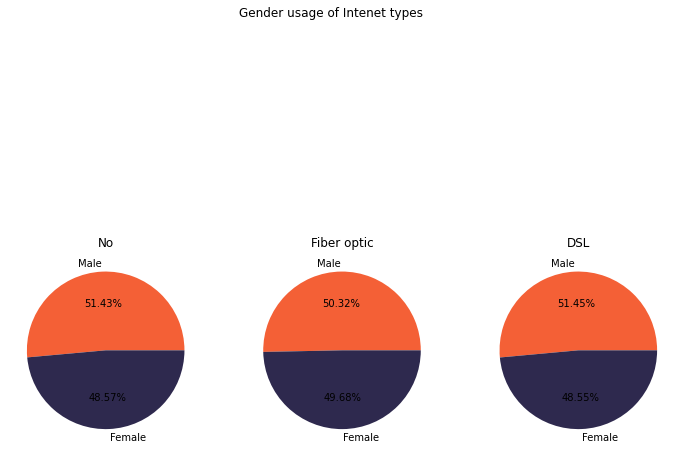

In [75]:
#ternetService - client's Internet service provider (DSL, Fiber optic, No) -(2,1,0)
fig, ax=plt.subplots(ncols=3,nrows=1, figsize=(12,10))
j=0
fig.suptitle('Gender usage of Intenet types')
for i in df['InternetService'].unique():
    ax[j].pie(df[df['InternetService']==i]['gender'].value_counts(), colors=colors, labels=['Male','Female'], autopct='%.2f%%');
    ax[j].set_title(i)
    j=j+1
#fig.show()

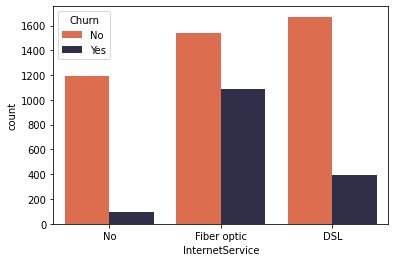

In [76]:
sns.countplot(x=df['InternetService'], hue=df['Churn'])


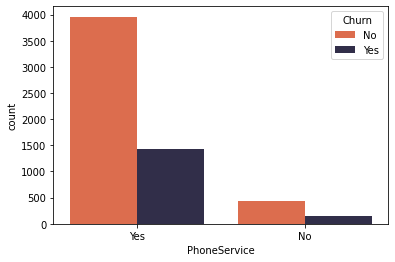

In [77]:
sns.countplot(x=df['PhoneService'], hue=df['Churn'])


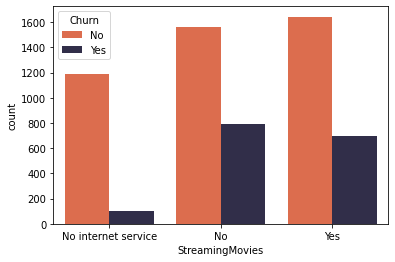

In [78]:
sns.countplot(x=df['StreamingMovies'], hue=df['Churn'])

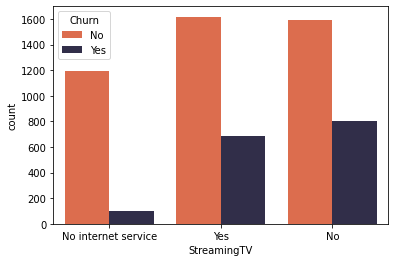

In [79]:
sns.countplot(x=df['StreamingTV'], hue=df['Churn'])

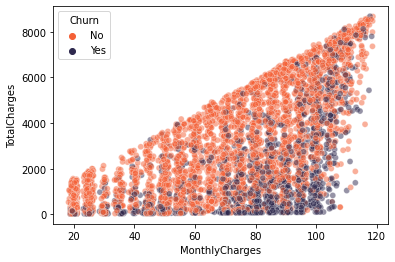

In [80]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(axis=0,inplace=True)

sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

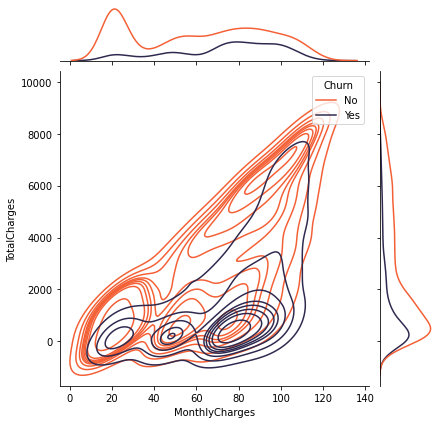

In [81]:
sns.jointplot(data=df,x='MonthlyCharges',y='TotalCharges', kind='kde', hue='Churn')

In [82]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('No internet service',0)
df=df.replace('No phone service',0)
df=df.replace('Fiber optic',2)
df=df.replace('DSL',1)
df=df.replace('Male',1)
df=df.replace('Female',0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   int64  
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   int64  
 3   Dependents        5976 non-null   int64  
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   int64  
 6   MultipleLines     5976 non-null   int64  
 7   InternetService   5976 non-null   int64  
 8   OnlineSecurity    5976 non-null   int64  
 9   OnlineBackup      5976 non-null   int64  
 10  DeviceProtection  5976 non-null   int64  
 11  TechSupport       5976 non-null   int64  
 12  StreamingTV       5976 non-null   int64  
 13  StreamingMovies   5976 non-null   int64  
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   int64  
 16  PaymentMethod     5976 non-null   object 


In [83]:
df1=pd.get_dummies(data=df, columns=['Contract','PaymentMethod'], drop_first=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [84]:
df1.columns[abs(df1.corr()['Churn'])>0.1]

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

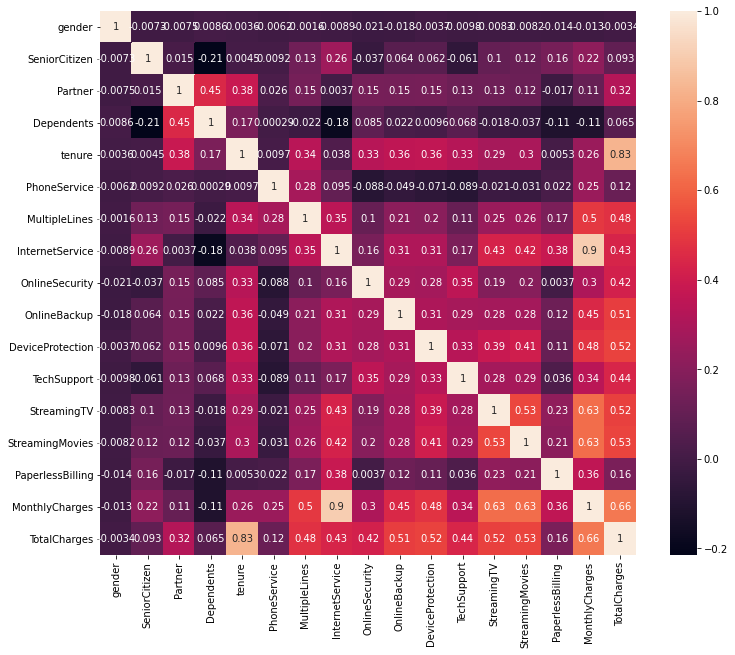

In [85]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('Churn',axis=1).corr(), annot=True)

In [86]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, accuracy_score

model_set=[LogisticRegression(), DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=10)]
       
for model in model_set:
    model.fit(X_train,y_train)
    model.score(X_train,y_train)
    pred = model.predict(X_test)
    print("Accuracy scoe of {} is {:.2f}%\n".format(model, accuracy_score(y_test, pred)*100))

Accuracy scoe of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 80.18%

Accuracy scoe of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 69.94%

Accuracy scoe of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weigh

0.7764825139381653


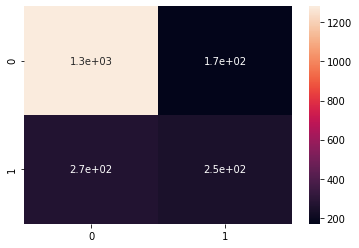

In [88]:
print(accuracy_score(y_test, pred))

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1451
           1       0.60      0.48      0.53       522

    accuracy                           0.78      1973
   macro avg       0.71      0.68      0.69      1973
weighted avg       0.76      0.78      0.77      1973



Matriz de Confusion
 [[1282  169]
 [ 272  250]]


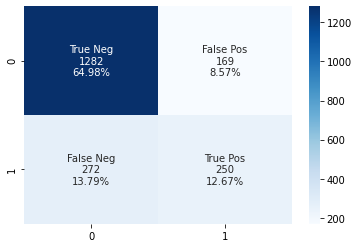

In [90]:
#---------------Mariz de confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,model.predict(X_test))
print('Matriz de Confusion\n',cf_matrix)
#---------------Matrix de confusion hecha en Seaborn
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
callback=EarlyStopping(monitor='val_loss',patience=3)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, validation_data=(X_test,y_test), verbose=1, epochs=100, callbacks=[callback])

Epoch 1/100
126/126 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.7047 - val_loss: 0.6862 - val_accuracy: 0.7152
Epoch 2/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.7295 - val_loss: 0.6510 - val_accuracy: 0.7334
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.7337 - val_loss: 0.5927 - val_accuracy: 0.7354
Epoch 4/100
126/126 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7339 - val_loss: 0.5394 - val_accuracy: 0.7354
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7339 - val_loss: 0.5081 - val_accuracy: 0.7354
Epoch 6/100
126/126 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7339 - val_loss: 0.4901 - val_accuracy: 0.7354
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7337 - val_loss: 0.4790 - val_accuracy: 0.7354

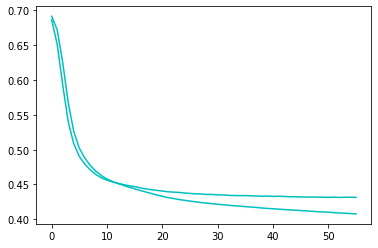

In [92]:
report =pd.DataFrame(model.history.history)
plt.plot(report[['loss','val_loss']], color='c');

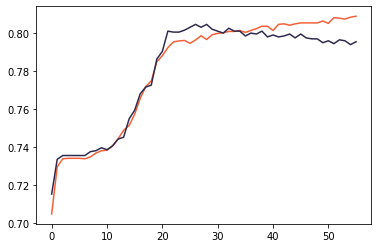

In [93]:
plt.plot(report[['accuracy','val_accuracy']])

In [94]:
pred = np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test,pred)

0.7354282818043588